# Project: Breast Cancer Prediction with and without PCA


## Author: Rahul Veggilam

Description: This project compares the accuracy of a Logistic Regression model trained on the breast cancer dataset with and without Principal Component Analysis (PCA). The goal is to demonstrate the effect of dimensionality reduction on model performance.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Step 1: Load the Breast Cancer Dataset
# The dataset is sourced from sklearn and contains 30 features about cell nuclei from breast cancer tumors. The target is binary: 0 (malignant) or 1 (benign).
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

## Step 2: Perform Exploratory Data Analysis (EDA)


In [3]:
# 2.1 Check the first few rows of the dataset
print("Head of the dataset:")
print(X.head())

Head of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst peri

In [4]:
# 2.2 Check the last few rows of the dataset
print("\nTail of the dataset:")
print(X.tail())


Tail of the dataset:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius

In [5]:
# 2.3 Basic statistics of the dataset
print("\nBasic statistics:")
print(X.describe())


Basic statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.

In [6]:
# 2.4 Information about the dataset (types, null values)
print("\nDataset info:")
print(X.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness 

In [7]:
# 2.5 Check for missing values
print("\nChecking for missing values:")
print(X.isnull().sum())


Checking for missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


## Step 3: Visualize Data with Basic Plots


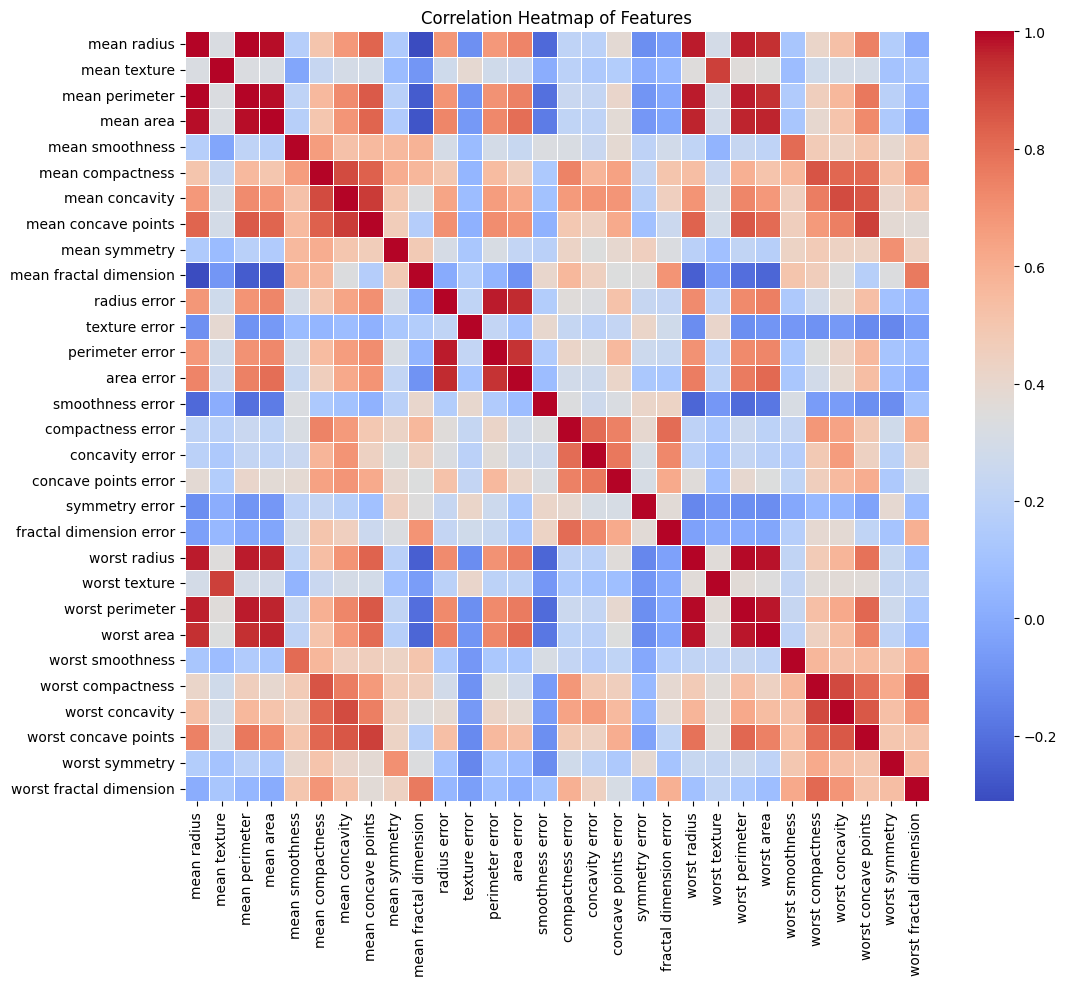

In [8]:
# 3.1 Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

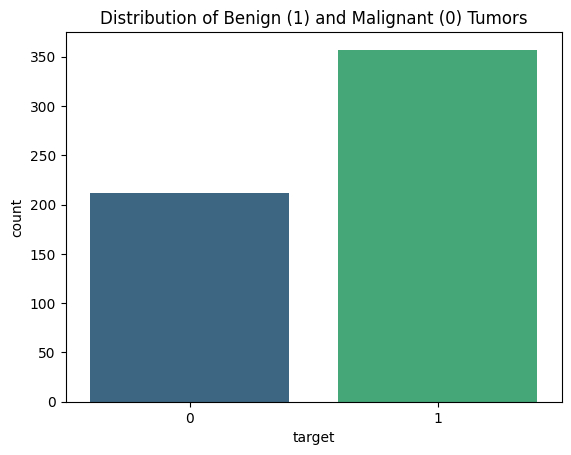

In [9]:
# Plot the count of benign (1) and malignant (0) tumors
sns.countplot(x=y, hue=y, palette='viridis', legend=False)
plt.title('Distribution of Benign (1) and Malignant (0) Tumors')
plt.show()


In [10]:
# Assume X and y are already defined
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Create a DataFrame combining the selected features and target
df = pd.concat([X[selected_features], y], axis=1)

# Plotly scatter matrix (pairplot equivalent)
fig = px.scatter_matrix(df, dimensions=selected_features, color='target',
                        title='Pairplot of Selected Features',
                        labels={'target': 'Target'},  # Customize hover labels
                        color_continuous_scale=px.colors.sequential.Viridis)

# Update layout to increase figure size and prevent axis label overlapping
fig.update_layout(
    width=1000,  # Set figure width
    height=1000,  # Set figure height
    title=dict(font=dict(size=20)),  # Increase title size
    margin=dict(l=50, r=50, b=100, t=100),  # Adjust margins
    font=dict(size=10)  # Adjust font size for readability
)

# Show the interactive plot
fig.show()


## Step 4: Preprocessing and Model Training


### We'll now continue with data preprocessing, including scaling, applying PCA, and training a Logistic Regression model.


In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data (important for both PCA and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 5: Train a Logistic Regression Model without PCA


In [12]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

y_pred_no_pca = model.predict(X_test_scaled)

accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")

Accuracy without PCA: 0.9825


## Step 6: Apply PCA for Dimensionality Reduction


In [13]:
# We'll reduce the dataset to 8 principal components using PCA.

pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Step 7: Train Logistic Regression on the reduced dataset (with PCA)


In [14]:
model_pca = LogisticRegression(max_iter=10000)
model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_pca:.4f}")

Accuracy with PCA: 0.9883


## Step 8: Results Comparison


In [15]:
# Compare accuracy scores with and without PCA.

print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
print(f"Accuracy with PCA: {accuracy_pca:.4f}")

Accuracy without PCA: 0.9825
Accuracy with PCA: 0.9883


### Conclusion: The model achieved an accuracy of 0.9825 without using PCA. However, after applying PCA, the accuracy improved to 0.9883. This indicates that dimensionality reduction through PCA not only simplifies the dataset but also enhances the model's performance slightly, suggesting that the principal components retained most of the important information while reducing noise or irrelevant features.
